In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [13]:
data_set = pd.read_csv('archive/drebin-215-dataset-5560malware-9476-benign.csv')
target = data_set['class']

print(len(target.loc[target=='S']))
target = [1 if x == 'S' else 0 for x in target]
data_set_x = data_set.drop(['class'], axis=1)
#print(data_set.iloc[:, 92])
data_set.info()
data_set.head()

5560
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_19349/2297527424.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv('archive/drebin-215-dataset-5560malware-9476-benign.csv')


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_19349/1733223399.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data_set.corr().abs()


['bindService', 'attachInterface', 'ServiceConnection', 'SecretKey', 'IBinder', 'android.os.IBinder', 'SUBSCRIBED_FEEDS_READ']


/var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/ipykernel_19349/1733223399.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_set.corr().shape)


(214, 214)


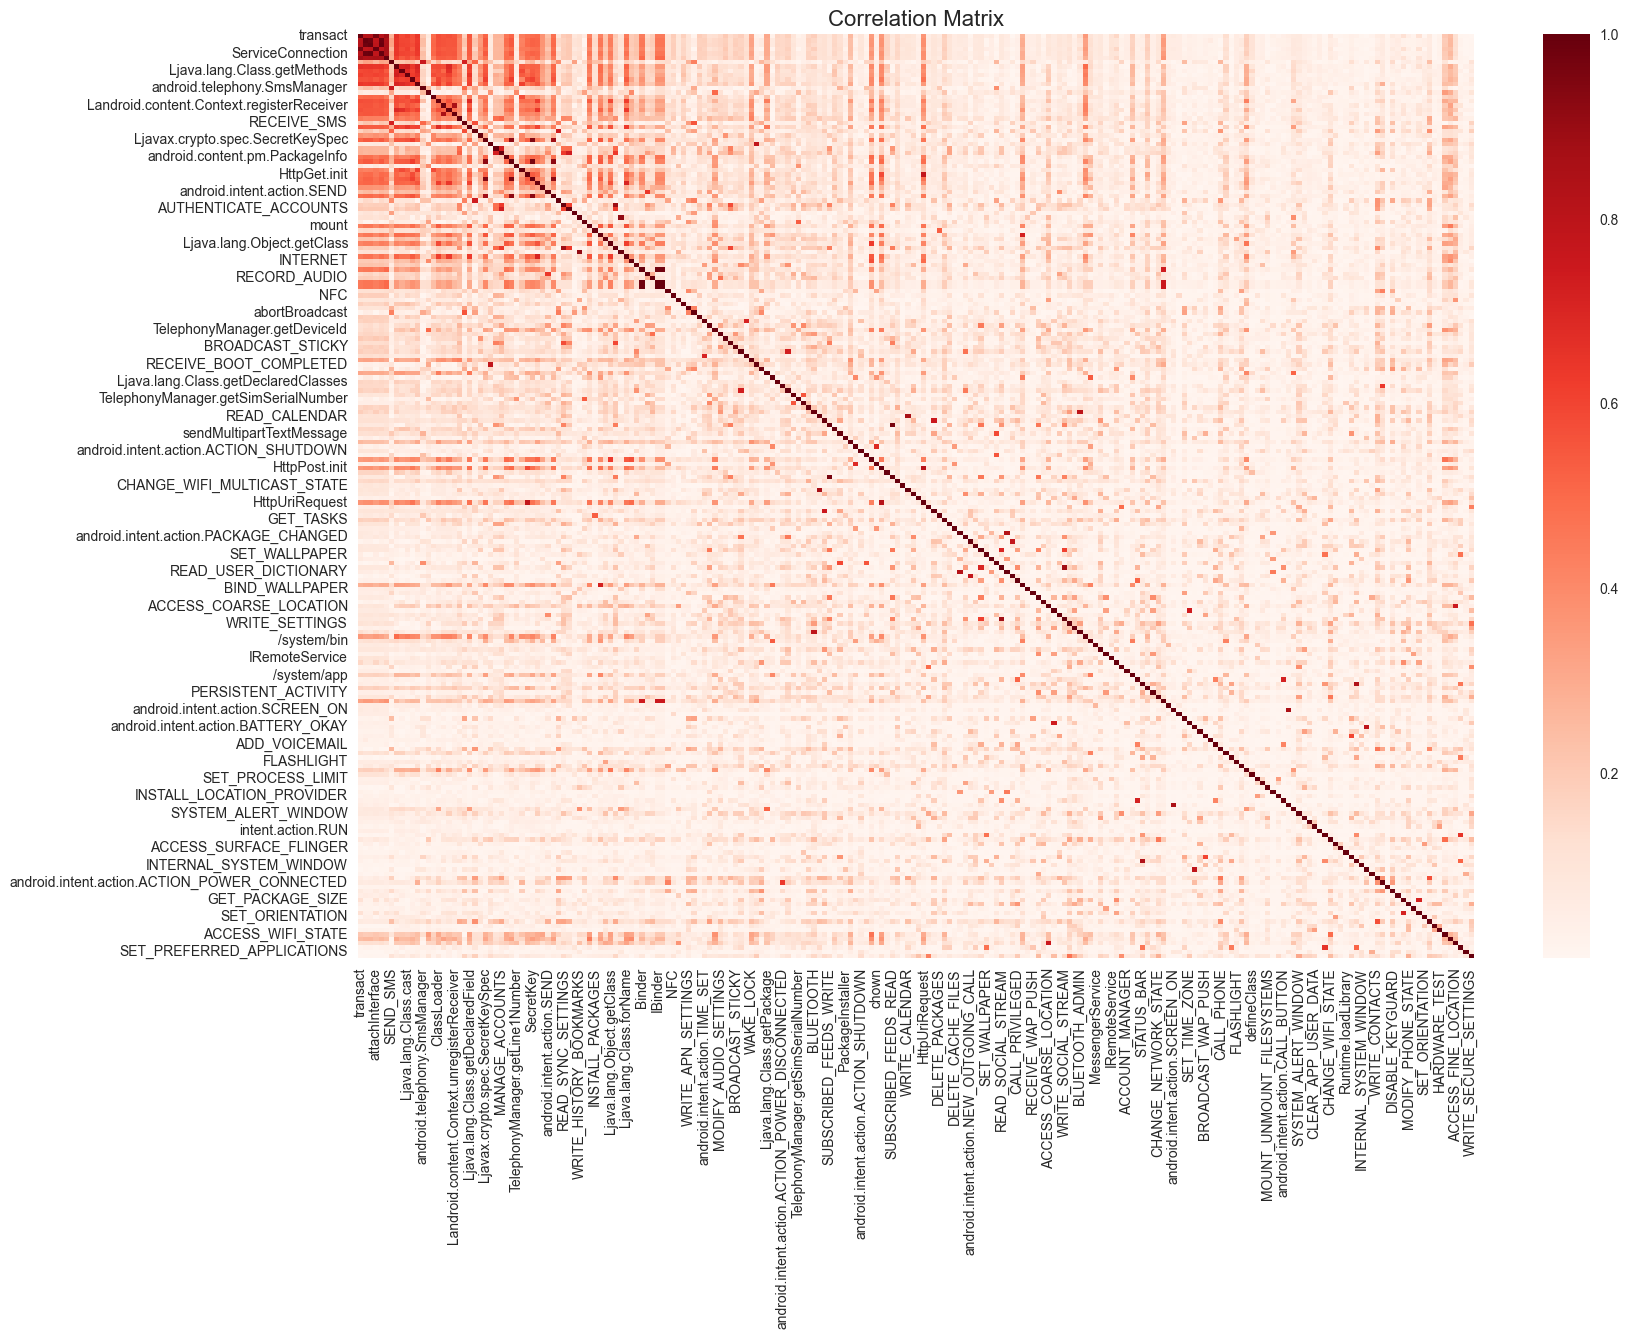

In [14]:
fig = plt.figure(figsize=(18, 12))
cor_matrix = data_set.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)
sns.heatmap(cor_matrix,  cmap=plt.cm.Reds)
print(data_set.corr().shape)
#plt.matshow(data_set.corr(), fignum=1)
#plt.xticks(range(len(data_set.columns)), data_set.columns, fontsize=14, rotation=90)
#plt.yticks(range(len(data_set.columns)), data_set.columns, fontsize=14, rotation=90)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [15]:
# which column has a non real number
#print(np.argmin(data_set_x.applymap(np.isreal)))
#print(data_set_x.columns[np.argmin(data_set_x.applymap(np.isreal))])
#print(data_set_x.columns[92])
#print(type(data_set_x))
numeric_column = pd.to_numeric(data_set_x.loc[:, data_set_x.columns[92]], errors='coerce')
nan_rows = numeric_column.isna()

previous_data_set_x = data_set_x.copy()
#print(f"ROWs of {data_set_x.columns[92]} that are not numbers: \n{data_set_x.loc[nan_rows, data_set_x.columns[92]]}")
data_set_x[data_set_x.columns[92]] = pd.to_numeric(data_set_x[data_set_x.columns[92]], errors='coerce').fillna(0)
print(f"new training x\n{ data_set_x.info()}")
print(f"old training x\n{ previous_data_set_x.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to WRITE_SECURE_SETTINGS
dtypes: float64(1), int64(214)
memory usage: 24.7 MB
new training x
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to WRITE_SECURE_SETTINGS
dtypes: int64(214), object(1)
memory usage: 24.7+ MB
old training x
None


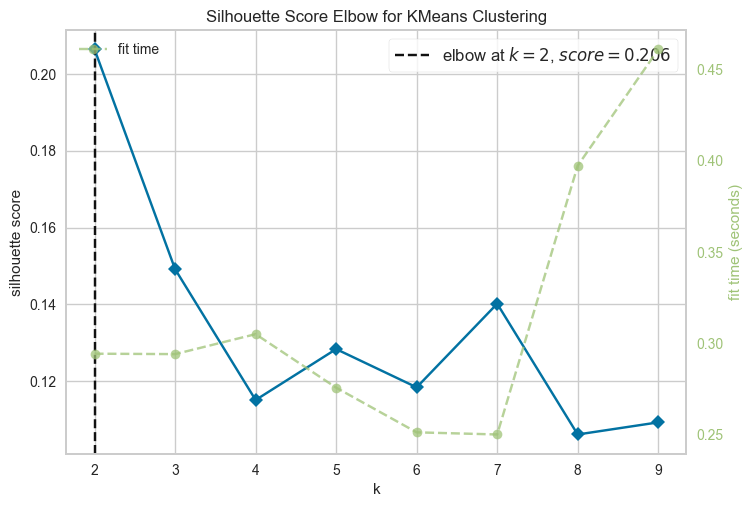

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(data_set_x) 
plt.legend()
visualizer.show() 



{'copy': True, 'iterated_power': 'auto', 'n_components': 2, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
15036
(15036, 2)
['bindService' 'android.intent.action.BOOT_COMPLETED']


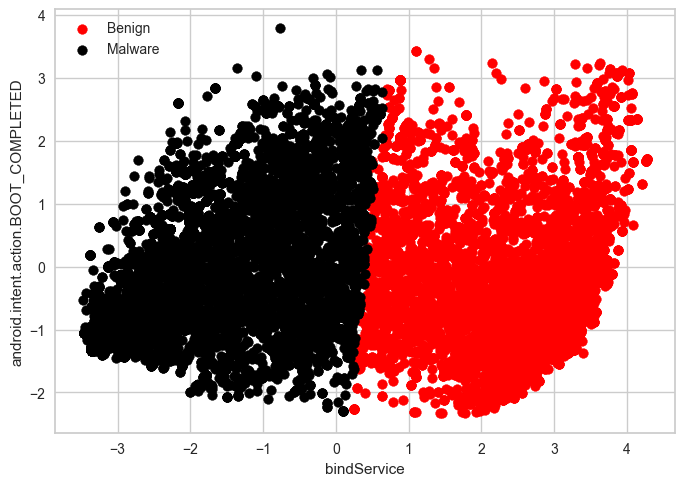

In [39]:
model = KMeans(n_clusters=2, n_init='auto')
pca = PCA(n_components=2)

data_pca_x = pca.fit_transform(data_set_x)
print(pca.get_params())
#print(data_pca_x)
label = model.fit_predict(data_set_x)
print(len(label))
print((data_pca_x.shape))
data_x_0 = data_pca_x[np.where(label == 0), 0]
data_x_1 = data_pca_x[np.where(label == 1), 0]
data_y_0 = data_pca_x[np.where(label == 0), 1]
data_y_1 = data_pca_x[np.where(label == 1), 1]
abs_loadings = abs(pca.components_)


max_loading_idxs = abs_loadings.argmax(axis=1)

selected_columns = data_set.columns[max_loading_idxs].values
print(selected_columns)
plt.scatter( data_x_0, data_y_0 , color = 'red', label="Benign")
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.scatter(data_x_1 , data_y_1 , color = 'black', label="Malware")
plt.legend(loc='upper left')
plt.show()

In [18]:

def GridSearchFun(model, metric, parameters, X_train, X_test, Y_train, Y_test, model_name='', weights=None):
    """Grid Search to find best hyperparameters
    Args:
        model (any): model 
        metric (string): choose the best model according with the metric
        parameters (_type_): set of different parameters
        X_train (_type_): training set (X)
        X_test (_type_): test set (X)
        Y_train (_type_): training set (Y)
        Y_test (_type_): test set (Y)
        model_name (str, optional): model's name. Defaults to ''.
    """    ''''''
    print(f"training model: {model_name}")
    clf = GridSearchCV(model, parameters, scoring=[
                       'f1'], n_jobs=-1,  refit='f1', cv=StratifiedKFold())
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    prec, recall, f1beta, _ = precision_recall_fscore_support(
        Y_test, pred,  average='binary', zero_division=1)
    f1 = 2.*(prec*recall)/(prec+recall)
    print("precision, recall, f1 = ",)
    print(f"Best parameters for {model_name} are: \n {clf.best_params_}")
    
    return clf.best_estimator_

In [40]:

print(type(data_set_x))
print(type(target))
X_train, X_test, y_train, y_test \
    = train_test_split(data_set_x, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)


max_iters = (400,  1000)
activations = ('identity', 'logistic', 'tanh', 'relu')
solvers = ('sgd', 'adam')
#learning_rates = ('constant', 'invscaling', 'adaptive')
learning_rates = ('constant', 'adaptive')
#shuffles = (True, False)
parameters = {'activation': activations, 'solver': solvers,
              'learning_rate': learning_rates, 'max_iter': max_iters}
mpl = MLPClassifier(early_stopping=True)

best_estimator= GridSearchFun(mpl, 'balanced_accuracy', parameters, X_train, X_val,
                                              y_train, y_val, 'Neural Network')

predict = best_estimator.predict(X_test)
print(f"best estimator params: {best_estimator.get_params()}")
print("accuracy on the test set: ", accuracy_score(y_test, predict))
#scores = cross_val_score(\
#mpl, X_train, y_train, cv=5, scoring='accuracy')



<class 'numpy.ndarray'>
<class 'list'>
training model: Neural Network
precision, recall, f1 = 
Best parameters for Neural Network are: 
 {'activation': 'relu', 'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'adam'}
accuracy on the test set:  0.9840425531914894


Text(0, 0.5, 'training loss')

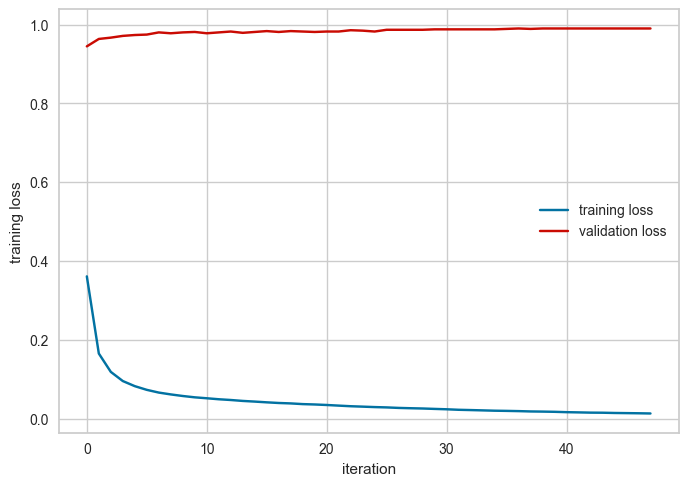

In [41]:
plt.plot(best_estimator.loss_curve_, label="training loss")
plt.plot(best_estimator.validation_scores_, c='r', label="validation loss")
plt.xlabel('iteration')
plt.legend()
plt.ylabel('training loss')

In [21]:

weights = {0: np.count_nonzero(y_train == 0)/float(len(y_train)), 1: np.count_nonzero(y_train == 1)/float(len(y_train))}

print(list(weights.values()))
model = GaussianNB()
#priors= (None, list(weights.values()))
parameters = {'var_smoothing': (1e-9, 1e-8, 1e-7)
              }
best_estimator= GridSearchFun(model, 'balanced_accuracy', parameters, X_train, X_val,
                                              y_train, y_val, 'Gaussian Naive Bayes')

predict = best_estimator.predict(X_test)
test_weights = [np.count_nonzero(y_test == 0)/len(y_test),np.count_nonzero(y_test == 1)/len(y_test)]
print("accuracy on the test set: ", accuracy_score(y_test, predict))


[0.6304179137567897, 0.36958208624321026]
training model: Gaussian Naive Bayes
precision, recall, f1 = 
Best parameters for Gaussian Naive Bayes are: 
 {'var_smoothing': 1e-07}
accuracy on the test set:  0.7446808510638298


In [22]:

criterion_dec_tree = ('gini', 'entropy')
splitter_dec_tree = ('best', 'random')
list1 = [None]
list2 = range(1, 10)
max_depth_dec_tree = [y for x in [list1, list2] for y in x]
min_samples_split_dec_tree = range(2, 10)
model = tree.DecisionTreeClassifier()

parameters = {'criterion': criterion_dec_tree, 'splitter': splitter_dec_tree,
              'max_depth': max_depth_dec_tree, 'min_samples_split': min_samples_split_dec_tree,
              }
best_estimator = GridSearchFun(model, 'balanced_accuracy', parameters, X_train, X_val,
                                              y_train, y_val, 'Decision Tree ')
predict = best_estimator.predict(X_test)
print("accuracy on the test set: ", accuracy_score(y_test, predict))


training model: Decision Tree 
precision, recall, f1 = 
Best parameters for Decision Tree  are: 
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 4, 'splitter': 'best'}
accuracy on the test set:  0.973404255319149
